# ASSOCIATION RULES

# Dataset

In [4]:
#import pakages

In [6]:
import pandas as pd

In [8]:
# Load the dataset
data = pd.read_csv('Online retail.csv')

# Display the first few rows of the dataset to inspect its structure
data.head()


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


# Data Preprocessing

In [11]:
# Convert the dataset into a list of transactions (splitting by comma)
transactions = data.iloc[:, 0].apply(lambda x: x.split(','))
# Display the first few transactions to verify the transformation
transactions.head()

0                           [burgers, meatballs, eggs]
1                                            [chutney]
2                                    [turkey, avocado]
3    [mineral water, milk, energy bar, whole wheat ...
4                                     [low fat yogurt]
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, dtype: object

# Association Rule Mining

In [14]:
#install 
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [16]:
#import the pakages
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm with a minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum confidence level
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
# Display the generated rules
print(rules)

                    antecedents      consequents  antecedent support  \
0                     (avocado)  (mineral water)            0.033200   
1                     (burgers)           (eggs)            0.087200   
2                     (burgers)   (french fries)            0.087200   
3                     (burgers)      (green tea)            0.087200   
4                     (burgers)           (milk)            0.087200   
..                          ...              ...                 ...   
157       (mineral water, milk)      (spaghetti)            0.048000   
158  (olive oil, mineral water)      (spaghetti)            0.027467   
159      (olive oil, spaghetti)  (mineral water)            0.022933   
160       (spaghetti, pancakes)  (mineral water)            0.025200   
161   (mineral water, pancakes)      (spaghetti)            0.033733   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.238267  0.011467    0.345382  1.44955

In [18]:
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Analysis and Interpretation

In [21]:
# Display the top 10 rules sorted by highest lift
top_lift_rules = rules.sort_values(by="lift", ascending=False).head(10)
print("Top 10 Rules by Lift:")
print(top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Display the top 10 rules sorted by highest confidence
top_confidence_rules = rules.sort_values(by="confidence", ascending=False).head(10)
print("\nTop 10 Rules by Confidence:")
print(top_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Find rules with both high lift and high confidence (e.g., lift > 2, confidence > 0.5)
high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
print("\nHigh-Quality Rules (Lift > 2 and Confidence > 0.5):")
print(high_quality_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Analyze specific items (e.g., find rules where 'mineral water' is involved)
mineral_water_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in str(x)) | rules['consequents'].apply(lambda x: 'mineral water' in str(x))]

print("\nRules Involving 'Mineral Water':")
print(mineral_water_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 10 Rules by Lift:
                            antecedents          consequents   support  \
75                      (herb & pepper)        (ground beef)  0.016000   
152          (spaghetti, mineral water)        (ground beef)  0.017067   
69                           (tomatoes)  (frozen vegetables)  0.016133   
67                             (shrimp)  (frozen vegetables)  0.016667   
144               (mineral water, milk)  (frozen vegetables)  0.011067   
154        (ground beef, mineral water)          (spaghetti)  0.017067   
143  (mineral water, frozen vegetables)               (milk)  0.011067   
151               (mineral water, milk)        (ground beef)  0.011067   
90                               (soup)               (milk)  0.015200   
80                        (ground beef)          (spaghetti)  0.039200   

     confidence      lift  
75     0.323450  3.291555  
152    0.285714  2.907540  
69     0.235867  2.474134  
67     0.233645  2.450820  
144    0.230556  2.4184

# Visualizing Association rules using a scatter plot

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
#import the pakage
import matplotlib.pyplot as plt

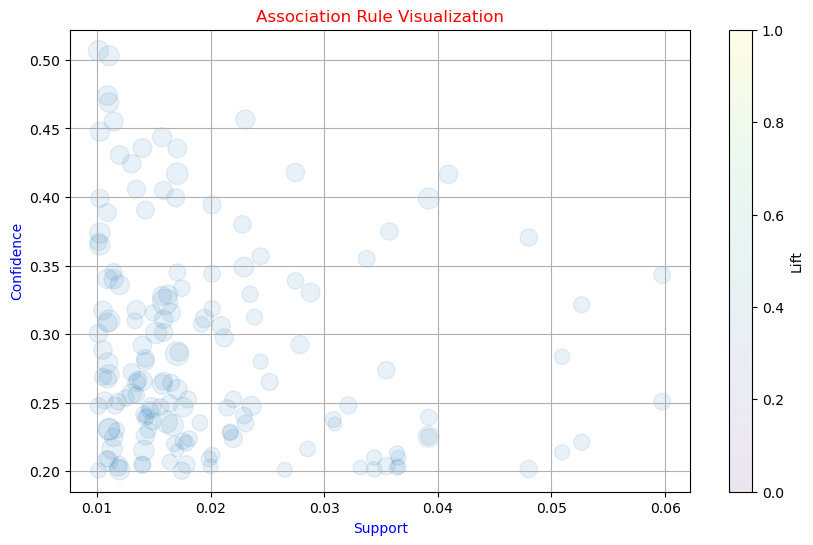

In [32]:
# DataFrame containing association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, alpha=0.1)
plt.xlabel('Support',color='blue')
plt.ylabel('Confidence',color='blue')
plt.title('Association Rule Visualization',color='red')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

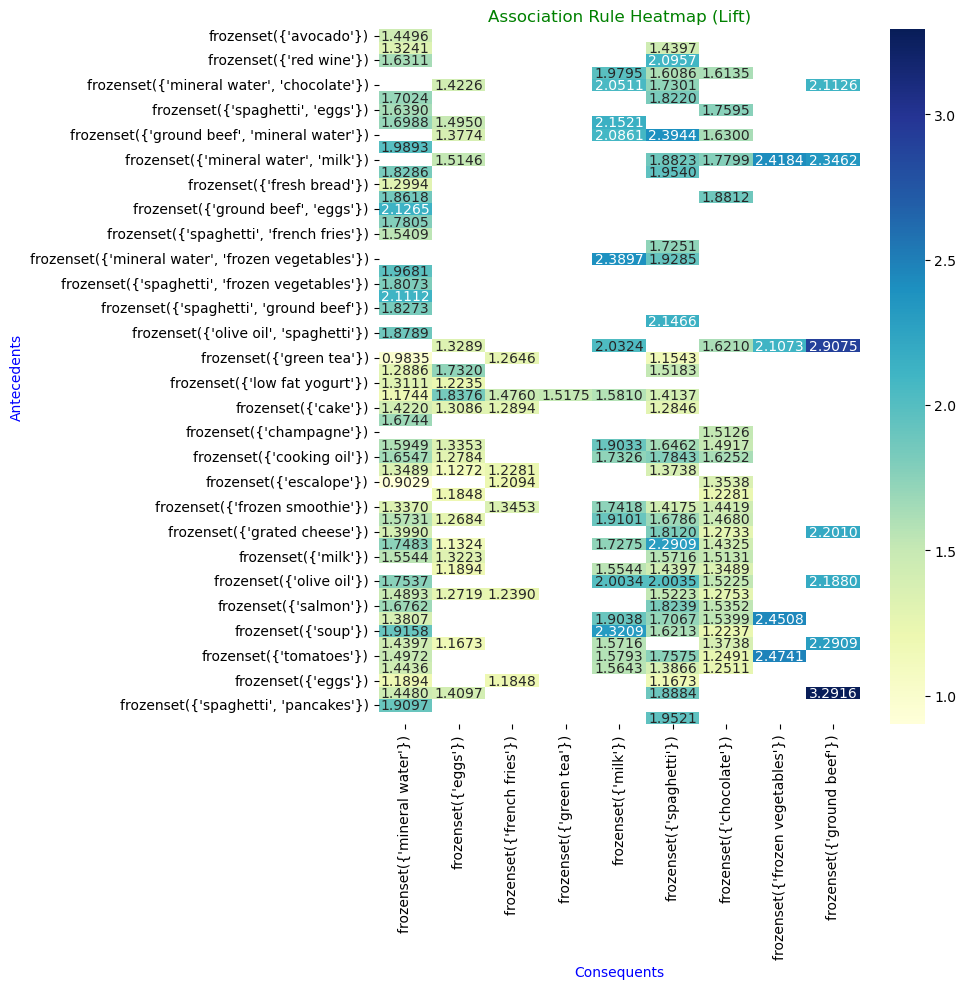

In [34]:
#visualization for association rules using the seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
# DataFrame containing association rules
# Create a pivot table for the heatmap
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')
# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('Association Rule Heatmap (Lift)',color='green')
plt.xlabel('Consequents',color='blue')
plt.ylabel('Antecedents',color='blue')
plt.tight_layout()
plt.show()

# Interview Questions:

1.	What is lift why is it important in Association rules?

# **2.What is support and Confidence. How do you calculate them?**

# **3.What are some limitations or challenges of Association rules mining?

In [ ]:

**Main Limitations and Challenges of Association Rules Mining:**
-------------------------------------------------------------------
1.Scalability: As the dataset size grows, the computational requirements for mining associations increase significantly. This can lead to long processing times and require substantial memory resources.

2.High Dimensionality: In datasets with many features, the number of potential itemsets grows exponentially, making it difficult to find meaningful associations without overwhelming the system with irrelevant or trivial rules.

3.Interpretability: The generated rules can be numerous and complex, making it hard to interpret or derive actionable insights.

3.Sparsity: In many datasets, especially in transaction data, items can be sparse. This can result in a low number of strong associations, making it challenging to identify meaningful patterns.


